# Aula 0 - Atividades e Exercício (vale nota)
### Compartilhe o seu caderno com o professor enviando o link para o seu caderno [neste formulário](https://forms.gle/UYvwc6SpA6HyiqdM6).


### Exercício 0.1
#### Usando o plotnine, produza um gráfico equivalente ao gráfico abaixo, mas no contexto do índice de gini dos municípios brasileiros. Os dados do índice de gini encontram-se aqui https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv. Este [tutorial no youtube](https://youtu.be/q816IZuqVNo?t=242) demonstra passo a passo como esse gráfico foi produzido.
#### Adaptações ao nosso exercício:

1.   Considere que as espécies (do gráfico abaixo) serão os anos 1991, 2000 e 2010 (que são colunas do dataset do índice de gini)
2.   E que a variável sexo será representada por Norte (UFs do Norte e Nordeste) e Sul (Sudeste, centro-oeste e sul). Não há um juízo de valor aqui, só uma maneira de criar uma variável binária e criar uma equivalência ao gráfico abaixo.



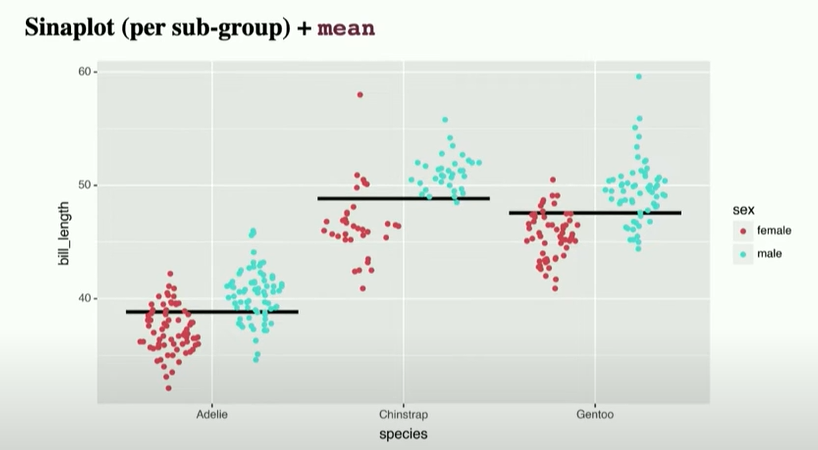

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# Lendo o arquivo CSV a partir da terceira linha (índice 2)
url = "https://github.com/alexlopespereira/mba_enap/raw/refs/heads/main/data/originais/gini/ginibr.csv"

# Lendo o arquivo, pulando as duas primeiras linhas, ignorando as duas últimas linhas, usando a terceira como cabeçalho, e tratando o footer corretamente
df = pd.read_csv(url, skiprows=2, skipfooter=2, engine='python', sep=';', decimal=',', na_values='...')

# Exibindo informações sobre o dataframe
print("Informações do DataFrame:")
print(df.info())
print("\nPrimeiras linhas:")
print(df.head())
print("\nÚltimas linhas:")
print(df.tail())
print(f"\nShape do DataFrame: {df.shape}")
print(f"\nNomes das colunas: {df.columns.tolist()}")




Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Município  5565 non-null   object 
 1   1991       4491 non-null   float64
 2   2000       5507 non-null   float64
 3   2010       5565 non-null   float64
dtypes: float64(3), object(1)
memory usage: 174.0+ KB
None

Primeiras linhas:
                        Município    1991    2000    2010
0    110001 Alta Floresta D'Oeste  0.5983  0.5868  0.5893
1  110037 Alto Alegre dos Parecis     NaN  0.5080  0.5491
2             110040 Alto Paraíso     NaN  0.6256  0.5417
3         110034 Alvorada D'Oeste  0.5690  0.6534  0.5355
4                110002 Ariquemes  0.5827  0.5927  0.5496

Últimas linhas:
                  Município    1991    2000    2010
5560      522200 Vianópolis  0.5622  0.6746  0.4672
5561  522205 Vicentinópolis  0.6308  0.5934  0.4824
5562        522220 Vila Boa  

In [2]:
#  Converter o dataframe para ter as colunas 1991, 2000 e 2010 como linhas
df_melted = df.melt(id_vars=['Município'], value_vars=['1991', '2000', '2010'],
                    var_name='ano', value_name='gini')

# Na coluna Município, separar o código do nome considerando que o código são os primeiros 6 dígitos, e criar uma nova coluna: "cod_ibge"
df_melted['cod_ibge'] = df_melted['Município'].str[:6]

# Separar os dois primeiros digitos do código IBGE para criar a coluna "UF"
df_melted['uf'] = df_melted['cod_ibge'].str[:2]

# Cria uma coluna com uma variável categórica para separar Norte (UFs do Norte e Nordeste) e Sul (Sudeste, centro-oeste e sul), considerando para tanto o código IBGE
norte_codes = ['11', '12', '13', '14', '15', '16', '17', '21', '22', '23', '24', '25', '26', '27', '28', '29']
df_melted['Região'] = df_melted['uf'].apply(lambda x: 'Norte' if x in norte_codes else 'Sul')

df_melted.head()

,Município,ano,gini,cod_ibge,uf,Região
0,110001 Alta Floresta D'Oeste,1991,0.5983,110001,11,Norte
1,110037 Alto Alegre dos Parecis,1991,NaN,110037,11,Norte
2,110040 Alto Paraíso,1991,NaN,110040,11,Norte
3,110034 Alvorada D'Oeste,1991,0.5690,110034,11,Norte
4,110002 Ariquemes,1991,0.5827,110002,11,Norte


In [3]:
# Calculate the mean gini for each UF and year
df_gini_mean_by_uf_year = df_melted.groupby(['uf', 'ano'])['gini'].mean().reset_index()
df_gini_mean_by_uf_year['grupo'] = np.where(df_gini_mean_by_uf_year['uf'].isin(norte_codes), 'Norte', 'Sul')

# Display the new DataFrame
df_gini_mean_by_uf_year.head()

,uf,ano,gini,grupo
0,11,1991,0.586809,Norte
1,11,2000,0.589750,Norte
2,11,2010,0.536892,Norte
3,12,1991,0.555500,Norte
4,12,2000,0.606527,Norte


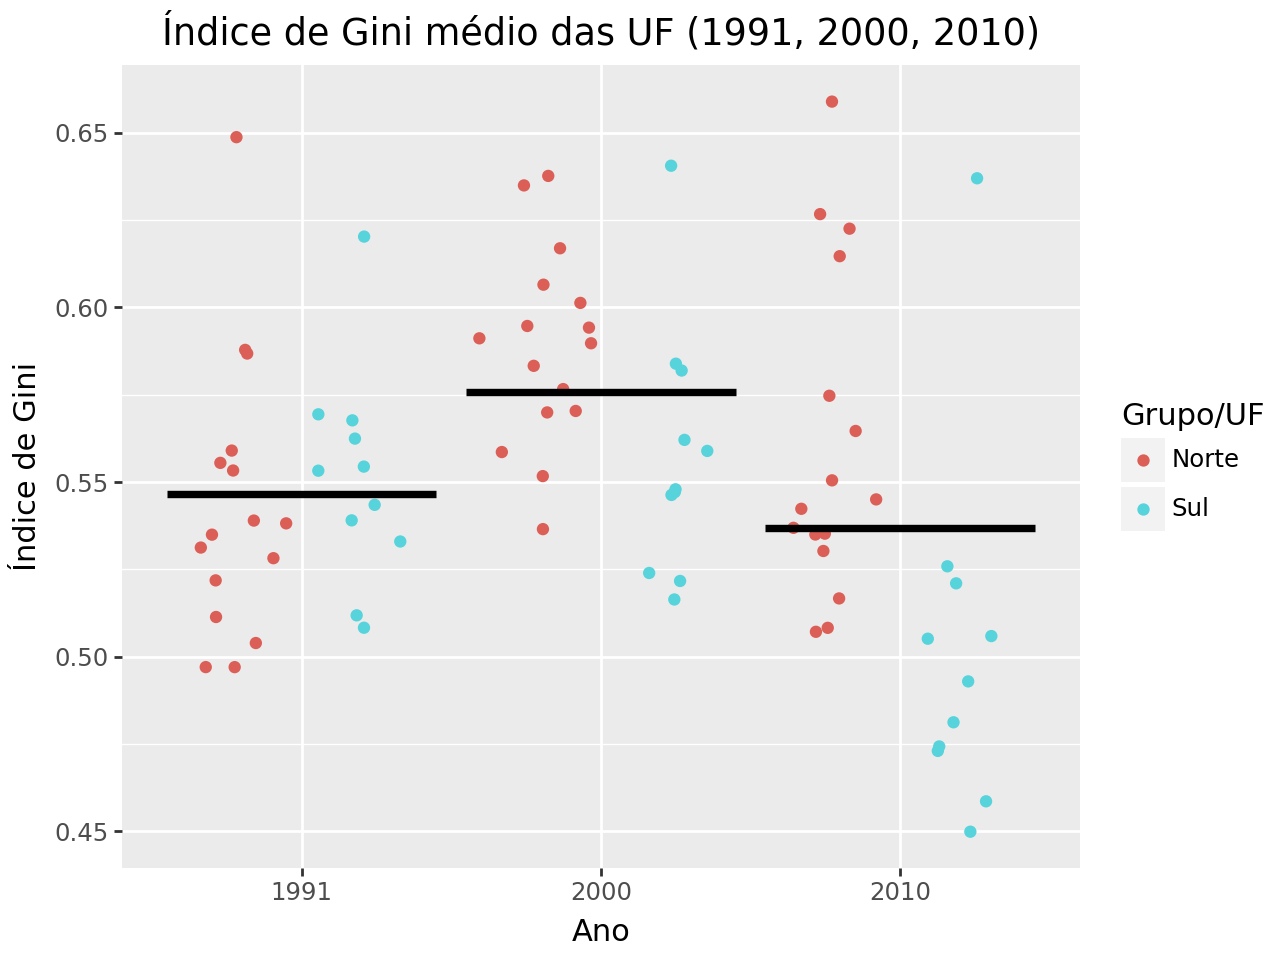

In [4]:
# Cria o plot (ajuste o tema conforme desejado)
p = (
    ggplot(df_gini_mean_by_uf_year, aes('ano', 'gini', color='grupo'))
    + geom_sina()
    + geom_segment(aes(
                      x=stage("ano", after_stat="x-.45"),
                      xend=stage("ano", after_stat="x+.45"),
                      yend=after_stat("y")
                      ),
                   stat="summary",
                   fun_y=np.mean,
                   color="black",
                   size=1.5
                  )

    + labs(
        title='Índice de Gini médio das UF (1991, 2000, 2010)',
        x='Ano',
        y='Índice de Gini',
        color='Grupo/UF' # Update legend title
    )
)
p